# 주식 간의 상관계수와 히트맵 🌡

늘 상승하는 주식을 고르면 좋겠지만 현실을 그렇지 않다.

그래서 주식을 고를때는 서로의 등락을 어느정도 상쇄시켜주는 주식들을 고르는 것이 변동성을 낮추는데 도움이 된다.

포트폴리오의 주식들의 상승정도를 낮추는 결과가 아닌가 생각할 수 있지만 

주식을 잃지 않는 것을 1원칙으로 한다면 위험도와 변동성을 줄이는 일은 중요하다.

우선 시가총액 기준 상위 15개 기업의 리스트를 구해보자

## 상위 15개 기업 리스트

8월 1일의 시가총액 기준 상위 15개의 기업 리스트를 작성해보자

read_date를 사용해서 구할 수 있다.

In [81]:
import pandas as pd
import numpt as np

from coredotfinance.data import KrxReader

krx = KrxReader()
df = krx.read_date('2021-08-02')
top_15_names = df.sort_values(by=['market_cap'], ascending=False)['name'][:15].to_list()
top_15_symbols = df.sort_values(by=['market_cap'], ascending=False)['symbol'][:15].to_list()

In [82]:
top_15_names

['삼성전자',
 'SK하이닉스',
 'NAVER',
 '카카오',
 'LG화학',
 '삼성바이오로직스',
 '삼성전자우',
 '삼성SDI',
 '현대차',
 '셀트리온',
 '기아',
 'POSCO',
 '삼성물산',
 '현대모비스',
 'LG전자']

## 상위 15개 기업의 데이터

그 다음 위 기업들의 최근 3개월간의 데이터를 read 함수를 이용해서 모아보자.

주식간의 상관관계는 등락률을 기준으로 볼 것이기 때문에 이에 `change_ratio` column의 데이터만 모은다

In [89]:
top_15_data = []

for symbol in top_15_symbols:
    data = krx.read(symbol=symbol, start = '2021-04-01', end = '2021-07-01')
    top_15_data.append(data['change_ratio'].to_list())

삼성전자
SK하이닉스
NAVER
카카오
LG화학
삼성바이오로직스
삼성전자우
삼성SDI
현대차
셀트리온
기아
POSCO
삼성물산
현대모비스
LG전자


## 상관계수 corr

`DataFrame`에 있는 `corr`를 사용해서 상관관계 계수를 얻어본다. 

`method`는 `pearson` 방식을 사용한다.

In [96]:
stock_data = pd.DataFrame(top_15_data).T
stock_data.columns = top_15_names
corr = stock_data.corr(method='pearson')

## 히트맵 using seaborn

plt의 font는 unicode를 인식하지 못한다.

따라서 unicode를 인식하는 폰트로 설정해줘야 한글이 깨지지 않는다.

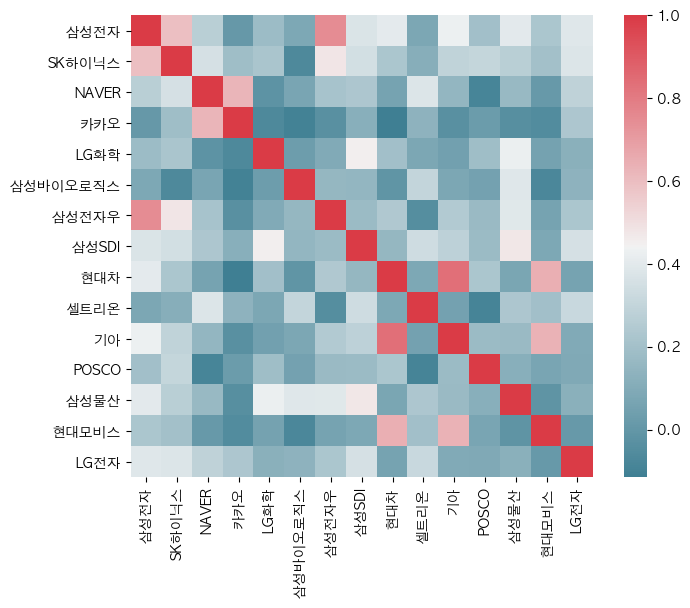

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

상관계수는 +1에 가까울수록 변동성(change_ratio)가 비슷하고 -1에 가까울수록 변동성이 반대로 움직임을 의미한다.

상관계수에 의해서 포트폴리오를 구성해본다면 삼성전자와 삼성전자우 하이닉스를 같이 구성하는 것은 효율적이지 못하다.

그보다는 삼성전자, 카카오, 셀트리온 식으로 구성하는 것이 효율적이다.